# Color Quantization using K-Means Algorithm

In [201]:
#IMPORTS
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import six
from io import StringIO

## What is Color Quantization
In computer graphics, color quantization or color image quantization is a process that reduces the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image.


![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)
An example image in 24-bit RGB color
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)
The same image reduced to a palette of 16-bit colors

# Why Color Quantization


In [202]:
#Image name you want to do color quantization
image_name="img1.jpg"
display.HTML('<img src="{}" height=20px style="height: 400px;">'.format("http://eskipaper.com/images/landscape-wallpaper-hd-40.jpg")) #To display the image

In [203]:
#To load the image as an numpy array
image = misc.imread(image_name)
print(image)
print(image.shape)


[[[225 216 221]
  [226 217 222]
  [226 217 222]
  ..., 
  [ 28  62 125]
  [ 29  63 126]
  [ 29  63 126]]

 [[225 216 221]
  [225 216 221]
  [225 216 221]
  ..., 
  [ 26  60 123]
  [ 26  60 123]
  [ 27  61 124]]

 [[221 215 219]
  [221 215 219]
  [222 216 220]
  ..., 
  [ 24  58 121]
  [ 24  58 121]
  [ 25  59 122]]

 ..., 
 [[ 82  63  30]
  [ 76  57  15]
  [ 92  73  31]
  ..., 
  [ 73  61  19]
  [ 41  30   0]
  [ 98  88  39]]

 [[ 39  19   0]
  [ 55  36   0]
  [ 67  48   6]
  ..., 
  [ 97  89  43]
  [104  96  49]
  [ 67  60   8]]

 [[ 63  42  11]
  [ 43  24   0]
  [ 33  14   0]
  ..., 
  [ 51  45   0]
  [ 50  44   0]
  [ 91  86  31]]]
(1080, 1920, 3)


In [204]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Widht:",w)
print("Height:",h)
print("Channels/Dimension:",d)
print("Each channel for RGB and Range is [0 -255]")
print("If each channel required 1 byte of space which means 3 bytes for each pixel")
print("\nThen for whole image it will require {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("Which comes around {} Mb".format((w*h*d)/(10000000)))

Widht: 1080
Height: 1920
Channels/Dimension: 3
Each channel for RGB and Range is [0 -255]
If each channel required 1 byte of space which means 3 bytes for each pixel

Then for whole image it will require 1080 x 1920 x 3 = 6220800 bytes
Which comes around 0.62208 Mb


* Its is a huge amount of size
* In applications like Embedded system and low storage systems not ideal to have image this big 
* For some applications we don't require the image to be of 16 milllion colours (255x255x255) so we can represent the image using limited colours by not afftecting the quality much
<hr>
* How to do it?
* One of the techniques is K-means Clustering

# K-means Clustering

* K-means Clustering is the most simplest Unsupervised Learning Algorithm
* K-means clustering aims to partition n observations into k clusters
* Used to cluster observations into groups of related observations without any prior knowledge of those relationships


![alt text](https://i.stack.imgur.com/cIDB3.png)

In [205]:
display.HTML('<img src="{}" height=20px style="height: 320px;">'.format("http://konukoii.com/blog/wp-content/uploads/2017/01/RunyanKmeans.gif"))

Given  k , the Llyod algorithm works as follows:
1. Randomly choose  k  data points (seeds) to be the initial centroids
2. Assign each data point to the closest centroid
3. Update the centroids by taking the mean of the members in the current cluster
4. Repeat step 2 and 3 until Convergence<br>
Convergence is when the centroid don't change much

![alt text](http://i.imgur.com/nIhdPrS.jpg)

#### We will convert the image to 64 colours only

In [206]:
n_colors = 64 #Value of k 

In [207]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
# plt.imshow behaves works well on float data (need to be in the range [0-1])
image = np.array(image, dtype=np.float64) / 255
# # Load Image and transform to a 2D numpy array.
# w, h, d = original_shape = tuple(image.shape)
# print(w,h,d)

assert d == 3 #The code forward runs for 3 channel only

Earlier we had each pixel as list inside row and each row was stored as list in bigger list.
Converting such that we have just each list of pixel inside a list

In [208]:
image_array = np.reshape(image, (w * h, d))
print(image_array)
print(image_array.shape)

[[ 0.88235294  0.84705882  0.86666667]
 [ 0.88627451  0.85098039  0.87058824]
 [ 0.88627451  0.85098039  0.87058824]
 ..., 
 [ 0.2         0.17647059  0.        ]
 [ 0.19607843  0.17254902  0.        ]
 [ 0.35686275  0.3372549   0.12156863]]
(2073600, 3)


In [209]:
%%javascript
//To make the output area non-scrollable
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Training using k-means for creating 64 cluster

In [210]:
print("Fitting model on a small sub-sample of the data")

t0 = time() #has time in seconds since epoch(1970)

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k(64) clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

#total seconds taken for fitting
print("done in %0.3fs." % (time() - t0)) 
# print("Sample Array size:",image_array_sample.shape)

print("\nK means Labels:\n",kmeans.labels_)
print("\nCluster Centers/ Centroids:\n",kmeans.cluster_centers_[:5])


Fitting model on a small sub-sample of the data
done in 0.605s.

K means Labels:
 [63 63 11 ..., 42 45 57]

Cluster Centers/ Centroids:
 [[ 0.54330065  0.39820261  0.09575163]
 [ 0.56502601  0.5857543   0.67979192]
 [ 0.13064633  0.116122    0.06259985]
 [ 0.12480818  0.31381074  0.6140665 ]
 [ 0.85359477  0.84016637  0.88163993]]


## Predicting Labels for all the pixels using the our clusters 

In [211]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
done in 1.218s.
Predicted Labels: [ 4  4  4 ..., 33 33 18]


## Using Random 64 points from top 1000 points of image array

In [212]:
#Taking random 64 points from top 1000 array elements
codebook_random = shuffle(image_array[:1000], random_state=0)[:n_colors + 1]

print(codebook_random[:5])
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,image_array,axis=0)
print("done in %0.3fs." % (time() - t0))
print(labels_random)

[[ 0.05490196  0.2         0.4745098 ]
 [ 0.04313725  0.18823529  0.45490196]
 [ 0.07058824  0.21960784  0.4745098 ]
 [ 0.05882353  0.20392157  0.47058824]
 [ 0.03921569  0.2         0.45882353]]
Predicting color indices on the full image (random)
done in 1.202s.
[29 29 29 ..., 13 13 13]


## Using Random 64 points from whole image array

In [213]:
#Taking random 64 points from top 1000 array elements
codebook_random2 = shuffle(image_array, random_state=0)[:n_colors + 1]

print(codebook_random2[:5])
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random2 = pairwise_distances_argmin(codebook_random2,image_array,axis=0)
print("done in %0.3fs." % (time() - t0))
print(labels_random2)

[[ 0.82352941  0.81176471  0.84705882]
 [ 0.8627451   0.8         0.84313725]
 [ 0.98431373  0.94117647  0.9254902 ]
 [ 0.25098039  0.45882353  0.71764706]
 [ 0.27843137  0.22352941  0.10980392]]
Predicting color indices on the full image (random)
done in 1.154s.
[42 61 61 ..., 64 64 20]


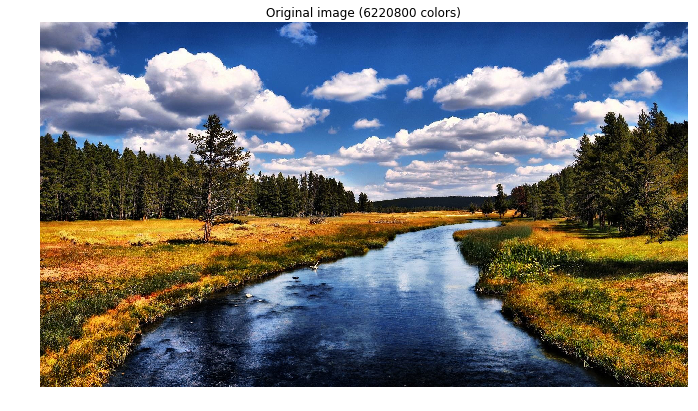

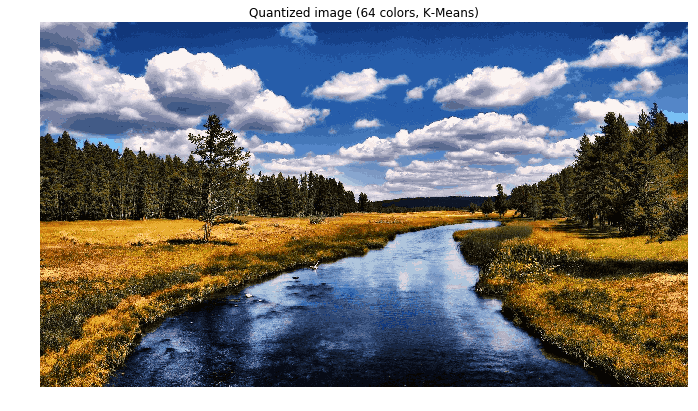

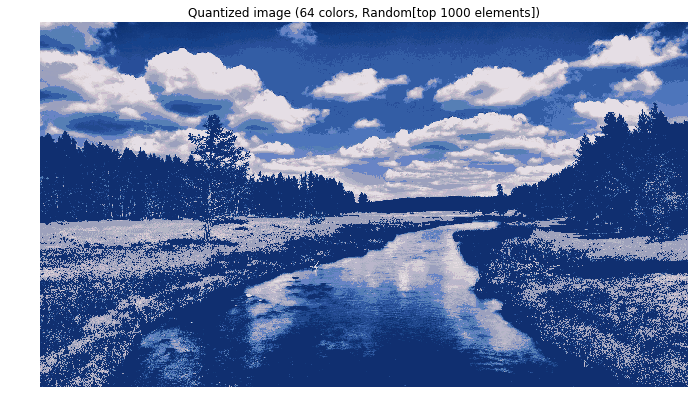

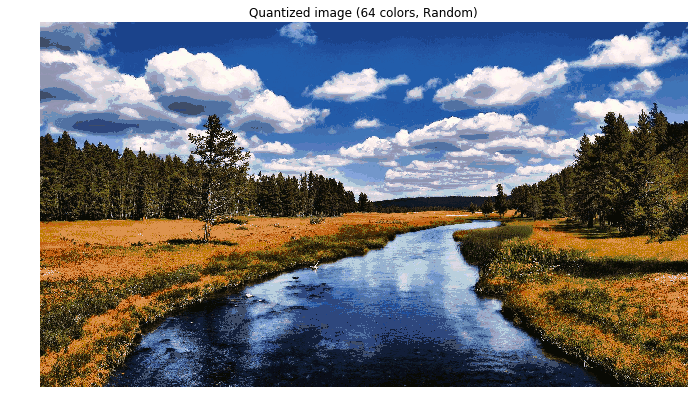

In [214]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

#Displaying Image using Random Algorithm top 1000 elements
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random[top 1000 elements])')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

#Displaying Image using Random Algorithm whole array
plt.figure(4)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random2, labels_random2, w, h))
plt.show()